## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  24.614382  1660.188717  0.101222  6.149894  1.442813
1  35.318829  1076.907864  0.577036  2.728150  1.480718
2  36.525368  1576.577135  0.563037  7.565685  1.446820
3  47.652599   608.430406  0.475779  5.254722  1.301546
4  61.230708   804.353762  0.768546  4.813904  1.414006


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.02574 | train_mse: 5.42872 | train_mae: 1.77886 |  0:00:00s
epoch 1  | loss: 0.68512 | train_mse: 3.38057 | train_mae: 1.38604 |  0:00:00s
epoch 2  | loss: 0.59158 | train_mse: 2.34897 | train_mae: 1.02931 |  0:00:00s


epoch 3  | loss: 0.41593 | train_mse: 1.86709 | train_mae: 0.96694 |  0:00:00s
epoch 4  | loss: 0.49852 | train_mse: 1.61013 | train_mae: 0.9143  |  0:00:00s
epoch 5  | loss: 0.41435 | train_mse: 1.13965 | train_mae: 0.74871 |  0:00:00s


epoch 6  | loss: 0.47095 | train_mse: 1.20532 | train_mae: 0.81957 |  0:00:00s
epoch 7  | loss: 0.46819 | train_mse: 1.58756 | train_mae: 0.98894 |  0:00:00s
epoch 8  | loss: 0.41764 | train_mse: 1.5418  | train_mae: 0.95188 |  0:00:01s


epoch 9  | loss: 0.42443 | train_mse: 1.4442  | train_mae: 0.87745 |  0:00:01s
epoch 10 | loss: 0.49312 | train_mse: 1.39448 | train_mae: 0.83403 |  0:00:01s
epoch 11 | loss: 0.34232 | train_mse: 1.90466 | train_mae: 0.90991 |  0:00:01s


epoch 12 | loss: 0.33202 | train_mse: 1.35903 | train_mae: 0.82218 |  0:00:01s
epoch 13 | loss: 0.5088  | train_mse: 0.80432 | train_mae: 0.58299 |  0:00:01s
epoch 14 | loss: 0.48993 | train_mse: 0.75997 | train_mae: 0.61761 |  0:00:01s


epoch 15 | loss: 0.48286 | train_mse: 1.04501 | train_mae: 0.76156 |  0:00:01s
epoch 16 | loss: 0.43096 | train_mse: 0.99095 | train_mae: 0.73984 |  0:00:01s
epoch 17 | loss: 0.53056 | train_mse: 0.8131  | train_mae: 0.64258 |  0:00:01s


epoch 18 | loss: 0.39489 | train_mse: 0.86414 | train_mae: 0.6496  |  0:00:01s
epoch 19 | loss: 0.46828 | train_mse: 0.84199 | train_mae: 0.62883 |  0:00:01s
epoch 20 | loss: 0.48474 | train_mse: 0.74735 | train_mae: 0.60142 |  0:00:02s


epoch 21 | loss: 0.46228 | train_mse: 0.59551 | train_mae: 0.54244 |  0:00:02s
epoch 22 | loss: 0.41041 | train_mse: 0.68642 | train_mae: 0.5735  |  0:00:02s
epoch 23 | loss: 0.4091  | train_mse: 0.78805 | train_mae: 0.61802 |  0:00:02s


epoch 24 | loss: 0.44468 | train_mse: 0.52619 | train_mae: 0.51937 |  0:00:02s
epoch 25 | loss: 0.37239 | train_mse: 0.42451 | train_mae: 0.46798 |  0:00:02s
epoch 26 | loss: 0.46733 | train_mse: 0.41523 | train_mae: 0.47127 |  0:00:02s


epoch 27 | loss: 0.40493 | train_mse: 0.43318 | train_mae: 0.47296 |  0:00:02s
epoch 28 | loss: 0.32554 | train_mse: 0.4664  | train_mae: 0.50806 |  0:00:02s
epoch 29 | loss: 0.33029 | train_mse: 0.41504 | train_mae: 0.49391 |  0:00:02s


epoch 30 | loss: 0.37434 | train_mse: 0.34189 | train_mae: 0.451   |  0:00:03s
epoch 31 | loss: 0.41318 | train_mse: 0.29613 | train_mae: 0.42863 |  0:00:03s
epoch 32 | loss: 0.40884 | train_mse: 0.48552 | train_mae: 0.47996 |  0:00:03s


epoch 33 | loss: 0.44105 | train_mse: 0.48089 | train_mae: 0.49326 |  0:00:03s
epoch 34 | loss: 0.25639 | train_mse: 0.51871 | train_mae: 0.51646 |  0:00:03s
epoch 35 | loss: 0.53276 | train_mse: 0.36297 | train_mae: 0.47152 |  0:00:03s


epoch 36 | loss: 0.25737 | train_mse: 0.28225 | train_mae: 0.42313 |  0:00:03s
epoch 37 | loss: 0.21965 | train_mse: 0.29553 | train_mae: 0.42796 |  0:00:03s
epoch 38 | loss: 0.50049 | train_mse: 0.2766  | train_mae: 0.41296 |  0:00:03s


epoch 39 | loss: 0.22473 | train_mse: 0.22123 | train_mae: 0.37003 |  0:00:03s
epoch 40 | loss: 0.35479 | train_mse: 0.27184 | train_mae: 0.39749 |  0:00:03s
epoch 41 | loss: 0.22849 | train_mse: 0.26966 | train_mae: 0.38267 |  0:00:03s


epoch 42 | loss: 0.36992 | train_mse: 0.22916 | train_mae: 0.35461 |  0:00:04s
epoch 43 | loss: 0.20391 | train_mse: 0.17202 | train_mae: 0.32632 |  0:00:04s
epoch 44 | loss: 0.19054 | train_mse: 0.20602 | train_mae: 0.34613 |  0:00:04s


epoch 45 | loss: 0.35812 | train_mse: 0.22228 | train_mae: 0.35202 |  0:00:04s
epoch 46 | loss: 0.19921 | train_mse: 0.27274 | train_mae: 0.37726 |  0:00:04s
epoch 47 | loss: 0.23477 | train_mse: 0.25856 | train_mae: 0.37683 |  0:00:04s


epoch 48 | loss: 0.2659  | train_mse: 0.25911 | train_mae: 0.38647 |  0:00:04s
epoch 49 | loss: 0.24173 | train_mse: 0.22414 | train_mae: 0.35435 |  0:00:04s
epoch 50 | loss: 0.1742  | train_mse: 0.20099 | train_mae: 0.33571 |  0:00:04s


epoch 51 | loss: 0.22794 | train_mse: 0.27132 | train_mae: 0.38727 |  0:00:04s
epoch 52 | loss: 0.24599 | train_mse: 0.23472 | train_mae: 0.37192 |  0:00:04s
epoch 53 | loss: 0.21485 | train_mse: 0.25491 | train_mae: 0.36898 |  0:00:05s


epoch 54 | loss: 0.25648 | train_mse: 0.22727 | train_mae: 0.34681 |  0:00:05s
epoch 55 | loss: 0.16561 | train_mse: 0.15829 | train_mae: 0.31651 |  0:00:05s
epoch 56 | loss: 0.48818 | train_mse: 0.35384 | train_mae: 0.37779 |  0:00:05s


epoch 57 | loss: 0.42482 | train_mse: 0.40917 | train_mae: 0.38387 |  0:00:05s
epoch 58 | loss: 0.27585 | train_mse: 0.37647 | train_mae: 0.37487 |  0:00:05s
epoch 59 | loss: 0.37671 | train_mse: 0.3156  | train_mae: 0.37477 |  0:00:05s


epoch 60 | loss: 0.42585 | train_mse: 0.28064 | train_mae: 0.37025 |  0:00:05s
epoch 61 | loss: 0.47284 | train_mse: 0.25601 | train_mae: 0.36237 |  0:00:05s
epoch 62 | loss: 0.27948 | train_mse: 0.25443 | train_mae: 0.37558 |  0:00:05s


epoch 63 | loss: 0.33343 | train_mse: 0.24174 | train_mae: 0.37921 |  0:00:05s
epoch 64 | loss: 0.34692 | train_mse: 0.22746 | train_mae: 0.37393 |  0:00:05s
epoch 65 | loss: 0.20381 | train_mse: 0.22926 | train_mae: 0.38218 |  0:00:06s


epoch 66 | loss: 0.30311 | train_mse: 0.23688 | train_mae: 0.38434 |  0:00:06s
epoch 67 | loss: 0.26742 | train_mse: 0.2083  | train_mae: 0.35517 |  0:00:06s
epoch 68 | loss: 0.25575 | train_mse: 0.1915  | train_mae: 0.3426  |  0:00:06s


epoch 69 | loss: 0.25378 | train_mse: 0.18849 | train_mae: 0.3497  |  0:00:06s
epoch 70 | loss: 0.32461 | train_mse: 0.20892 | train_mae: 0.36582 |  0:00:06s
epoch 71 | loss: 0.25218 | train_mse: 0.19045 | train_mae: 0.35285 |  0:00:06s


epoch 72 | loss: 0.31533 | train_mse: 0.17197 | train_mae: 0.33395 |  0:00:06s
epoch 73 | loss: 0.25452 | train_mse: 0.20354 | train_mae: 0.36085 |  0:00:06s
epoch 74 | loss: 0.19117 | train_mse: 0.17675 | train_mae: 0.34228 |  0:00:06s


epoch 75 | loss: 0.30719 | train_mse: 0.17073 | train_mae: 0.3414  |  0:00:06s
epoch 76 | loss: 0.23756 | train_mse: 0.17087 | train_mae: 0.3288  |  0:00:06s
epoch 77 | loss: 0.24861 | train_mse: 0.1639  | train_mae: 0.31783 |  0:00:07s


epoch 78 | loss: 0.21867 | train_mse: 0.15521 | train_mae: 0.30784 |  0:00:07s
epoch 79 | loss: 0.46753 | train_mse: 0.21521 | train_mae: 0.35155 |  0:00:07s
epoch 80 | loss: 0.37303 | train_mse: 0.25873 | train_mae: 0.36874 |  0:00:07s


epoch 81 | loss: 0.32883 | train_mse: 0.23307 | train_mae: 0.36129 |  0:00:07s
epoch 82 | loss: 0.30466 | train_mse: 0.19861 | train_mae: 0.34801 |  0:00:07s
epoch 83 | loss: 0.22149 | train_mse: 0.22379 | train_mae: 0.36491 |  0:00:07s


epoch 84 | loss: 0.33572 | train_mse: 0.28353 | train_mae: 0.37345 |  0:00:07s
epoch 85 | loss: 0.32958 | train_mse: 0.27314 | train_mae: 0.37473 |  0:00:07s
epoch 86 | loss: 0.28928 | train_mse: 0.21732 | train_mae: 0.3584  |  0:00:07s


epoch 87 | loss: 0.22814 | train_mse: 0.18275 | train_mae: 0.33601 |  0:00:07s
epoch 88 | loss: 0.29656 | train_mse: 0.17362 | train_mae: 0.32881 |  0:00:07s
epoch 89 | loss: 0.17429 | train_mse: 0.19759 | train_mae: 0.33842 |  0:00:08s


epoch 90 | loss: 0.17648 | train_mse: 0.27114 | train_mae: 0.36407 |  0:00:08s
epoch 91 | loss: 0.42027 | train_mse: 0.4672  | train_mae: 0.44825 |  0:00:08s
epoch 92 | loss: 0.29007 | train_mse: 0.32098 | train_mae: 0.41942 |  0:00:08s


epoch 93 | loss: 0.22792 | train_mse: 0.42601 | train_mae: 0.43585 |  0:00:08s
epoch 94 | loss: 0.25794 | train_mse: 0.40787 | train_mae: 0.40483 |  0:00:08s
epoch 95 | loss: 0.20957 | train_mse: 0.35987 | train_mae: 0.37304 |  0:00:08s


epoch 96 | loss: 0.17496 | train_mse: 0.35215 | train_mae: 0.36214 |  0:00:08s
epoch 97 | loss: 0.1722  | train_mse: 0.20125 | train_mae: 0.34708 |  0:00:08s
epoch 98 | loss: 0.37469 | train_mse: 0.18595 | train_mae: 0.34696 |  0:00:08s


epoch 99 | loss: 0.20804 | train_mse: 0.17267 | train_mae: 0.32491 |  0:00:08s
epoch 100| loss: 0.29775 | train_mse: 0.16309 | train_mae: 0.30866 |  0:00:08s
epoch 101| loss: 0.17763 | train_mse: 0.1545  | train_mae: 0.29605 |  0:00:09s


epoch 102| loss: 0.38962 | train_mse: 0.15837 | train_mae: 0.31418 |  0:00:09s
epoch 103| loss: 0.23899 | train_mse: 0.15875 | train_mae: 0.31552 |  0:00:09s
epoch 104| loss: 0.51724 | train_mse: 0.14648 | train_mae: 0.30501 |  0:00:09s


epoch 105| loss: 0.19323 | train_mse: 0.16265 | train_mae: 0.31839 |  0:00:09s
epoch 106| loss: 0.16579 | train_mse: 0.16425 | train_mae: 0.31626 |  0:00:09s


epoch 107| loss: 0.21476 | train_mse: 0.14802 | train_mae: 0.30438 |  0:00:09s
epoch 108| loss: 0.32976 | train_mse: 0.15829 | train_mae: 0.30634 |  0:00:09s
epoch 109| loss: 0.21916 | train_mse: 0.14302 | train_mae: 0.2965  |  0:00:09s


epoch 110| loss: 0.25523 | train_mse: 0.13219 | train_mae: 0.28762 |  0:00:09s
epoch 111| loss: 0.18734 | train_mse: 0.11901 | train_mae: 0.27322 |  0:00:09s
epoch 112| loss: 0.36105 | train_mse: 0.11949 | train_mae: 0.26902 |  0:00:10s


epoch 113| loss: 0.14787 | train_mse: 0.11936 | train_mae: 0.27786 |  0:00:10s
epoch 114| loss: 0.18035 | train_mse: 0.1379  | train_mae: 0.2979  |  0:00:10s
epoch 115| loss: 0.11479 | train_mse: 0.1303  | train_mae: 0.29247 |  0:00:10s


epoch 116| loss: 0.11242 | train_mse: 0.13162 | train_mae: 0.29308 |  0:00:10s
epoch 117| loss: 0.33246 | train_mse: 0.12953 | train_mae: 0.28874 |  0:00:10s
epoch 118| loss: 0.13899 | train_mse: 0.17489 | train_mae: 0.31334 |  0:00:10s


epoch 119| loss: 0.19067 | train_mse: 0.24983 | train_mae: 0.35129 |  0:00:10s
epoch 120| loss: 0.19825 | train_mse: 0.20911 | train_mae: 0.33596 |  0:00:10s
epoch 121| loss: 0.33179 | train_mse: 0.16833 | train_mae: 0.31456 |  0:00:10s


epoch 122| loss: 0.15888 | train_mse: 0.16729 | train_mae: 0.30572 |  0:00:10s
epoch 123| loss: 0.12028 | train_mse: 0.19406 | train_mae: 0.32078 |  0:00:11s
epoch 124| loss: 0.15539 | train_mse: 0.20173 | train_mae: 0.32599 |  0:00:11s


epoch 125| loss: 0.20432 | train_mse: 0.15241 | train_mae: 0.30408 |  0:00:11s
epoch 126| loss: 0.18195 | train_mse: 0.13408 | train_mae: 0.29935 |  0:00:11s
epoch 127| loss: 0.17105 | train_mse: 0.13412 | train_mae: 0.29838 |  0:00:11s


epoch 128| loss: 0.16192 | train_mse: 0.14303 | train_mae: 0.30282 |  0:00:11s
epoch 129| loss: 0.16809 | train_mse: 0.18684 | train_mae: 0.32025 |  0:00:11s
epoch 130| loss: 0.17397 | train_mse: 0.20825 | train_mae: 0.33078 |  0:00:11s


epoch 131| loss: 0.24652 | train_mse: 0.24377 | train_mae: 0.35784 |  0:00:11s
epoch 132| loss: 0.19105 | train_mse: 0.20414 | train_mae: 0.33972 |  0:00:11s
epoch 133| loss: 0.23696 | train_mse: 0.11206 | train_mae: 0.27667 |  0:00:11s


epoch 134| loss: 0.14142 | train_mse: 0.10128 | train_mae: 0.25691 |  0:00:12s
epoch 135| loss: 0.18989 | train_mse: 0.1078  | train_mae: 0.27261 |  0:00:12s
epoch 136| loss: 0.20966 | train_mse: 0.11574 | train_mae: 0.28424 |  0:00:12s


epoch 137| loss: 0.16141 | train_mse: 0.11707 | train_mae: 0.27632 |  0:00:12s
epoch 138| loss: 0.14653 | train_mse: 0.12184 | train_mae: 0.28538 |  0:00:12s
epoch 139| loss: 0.13378 | train_mse: 0.1071  | train_mae: 0.26755 |  0:00:12s


epoch 140| loss: 0.15638 | train_mse: 0.12436 | train_mae: 0.28158 |  0:00:12s
epoch 141| loss: 0.30046 | train_mse: 0.16031 | train_mae: 0.31904 |  0:00:12s


epoch 142| loss: 0.17288 | train_mse: 0.19478 | train_mae: 0.34171 |  0:00:12s
epoch 143| loss: 0.18572 | train_mse: 0.1977  | train_mae: 0.33379 |  0:00:12s
epoch 144| loss: 0.14652 | train_mse: 0.24881 | train_mae: 0.35933 |  0:00:12s


epoch 145| loss: 0.1964  | train_mse: 0.26269 | train_mae: 0.36065 |  0:00:12s
epoch 146| loss: 0.11824 | train_mse: 0.28924 | train_mae: 0.361   |  0:00:13s
epoch 147| loss: 0.13555 | train_mse: 0.31223 | train_mae: 0.3642  |  0:00:13s


epoch 148| loss: 0.11186 | train_mse: 0.29925 | train_mae: 0.36391 |  0:00:13s
epoch 149| loss: 0.14603 | train_mse: 0.28413 | train_mae: 0.36083 |  0:00:13s
epoch 150| loss: 0.16659 | train_mse: 0.26133 | train_mae: 0.3517  |  0:00:13s


epoch 151| loss: 0.25215 | train_mse: 0.20969 | train_mae: 0.32849 |  0:00:13s
epoch 152| loss: 0.23436 | train_mse: 0.14979 | train_mae: 0.29602 |  0:00:13s
epoch 153| loss: 0.22887 | train_mse: 0.12586 | train_mae: 0.27185 |  0:00:13s


epoch 154| loss: 0.12993 | train_mse: 0.13473 | train_mae: 0.27601 |  0:00:13s
epoch 155| loss: 0.24069 | train_mse: 0.14696 | train_mae: 0.28634 |  0:00:13s
epoch 156| loss: 0.11225 | train_mse: 0.15565 | train_mae: 0.29796 |  0:00:13s


epoch 157| loss: 0.1821  | train_mse: 0.15714 | train_mae: 0.29811 |  0:00:14s
epoch 158| loss: 0.10578 | train_mse: 0.16432 | train_mae: 0.29374 |  0:00:14s
epoch 159| loss: 0.19806 | train_mse: 0.18195 | train_mae: 0.29818 |  0:00:14s


epoch 160| loss: 0.18032 | train_mse: 0.22537 | train_mae: 0.3181  |  0:00:14s
epoch 161| loss: 0.18297 | train_mse: 0.24627 | train_mae: 0.31398 |  0:00:14s
epoch 162| loss: 0.13322 | train_mse: 0.17746 | train_mae: 0.2872  |  0:00:14s


epoch 163| loss: 0.12734 | train_mse: 0.12914 | train_mae: 0.26545 |  0:00:14s
epoch 164| loss: 0.19231 | train_mse: 0.09472 | train_mae: 0.23186 |  0:00:14s
epoch 165| loss: 0.35597 | train_mse: 0.10168 | train_mae: 0.24252 |  0:00:14s


epoch 166| loss: 0.21984 | train_mse: 0.11284 | train_mae: 0.25158 |  0:00:14s
epoch 167| loss: 0.20539 | train_mse: 0.12316 | train_mae: 0.26504 |  0:00:14s
epoch 168| loss: 0.14311 | train_mse: 0.12941 | train_mae: 0.27578 |  0:00:14s


epoch 169| loss: 0.12504 | train_mse: 0.11829 | train_mae: 0.26928 |  0:00:15s
epoch 170| loss: 0.11787 | train_mse: 0.09454 | train_mae: 0.24176 |  0:00:15s
epoch 171| loss: 0.34328 | train_mse: 0.07868 | train_mae: 0.21897 |  0:00:15s


epoch 172| loss: 0.34358 | train_mse: 0.07543 | train_mae: 0.21929 |  0:00:15s
epoch 173| loss: 0.1958  | train_mse: 0.09645 | train_mae: 0.25012 |  0:00:15s
epoch 174| loss: 0.15433 | train_mse: 0.11074 | train_mae: 0.26131 |  0:00:15s


epoch 175| loss: 0.20429 | train_mse: 0.11368 | train_mae: 0.26022 |  0:00:15s
epoch 176| loss: 0.11131 | train_mse: 0.12767 | train_mae: 0.25976 |  0:00:15s
epoch 177| loss: 0.135   | train_mse: 0.13946 | train_mae: 0.26228 |  0:00:15s


epoch 178| loss: 0.12095 | train_mse: 0.14173 | train_mae: 0.26959 |  0:00:15s
epoch 179| loss: 0.09949 | train_mse: 0.13475 | train_mae: 0.26955 |  0:00:15s
epoch 180| loss: 0.23096 | train_mse: 0.13933 | train_mae: 0.27656 |  0:00:15s


epoch 181| loss: 0.10987 | train_mse: 0.13877 | train_mae: 0.27445 |  0:00:16s
epoch 182| loss: 0.08771 | train_mse: 0.12381 | train_mae: 0.26699 |  0:00:16s
epoch 183| loss: 0.19566 | train_mse: 0.11294 | train_mae: 0.25223 |  0:00:16s


epoch 184| loss: 0.10718 | train_mse: 0.1083  | train_mae: 0.25412 |  0:00:16s
epoch 185| loss: 0.07845 | train_mse: 0.11451 | train_mae: 0.25976 |  0:00:16s
epoch 186| loss: 0.17892 | train_mse: 0.12043 | train_mae: 0.26215 |  0:00:16s


epoch 187| loss: 0.15635 | train_mse: 0.15438 | train_mae: 0.28633 |  0:00:16s
epoch 188| loss: 0.14065 | train_mse: 0.15718 | train_mae: 0.28516 |  0:00:16s
epoch 189| loss: 0.15066 | train_mse: 0.13536 | train_mae: 0.27836 |  0:00:16s


epoch 190| loss: 0.28715 | train_mse: 0.1058  | train_mae: 0.25607 |  0:00:16s
epoch 191| loss: 0.10656 | train_mse: 0.08207 | train_mae: 0.22637 |  0:00:16s
epoch 192| loss: 0.15155 | train_mse: 0.07531 | train_mae: 0.22185 |  0:00:16s


epoch 193| loss: 0.36759 | train_mse: 0.07805 | train_mae: 0.22673 |  0:00:17s
epoch 194| loss: 0.15348 | train_mse: 0.08844 | train_mae: 0.23701 |  0:00:17s
epoch 195| loss: 0.14405 | train_mse: 0.08681 | train_mae: 0.23653 |  0:00:17s


epoch 196| loss: 0.14556 | train_mse: 0.10674 | train_mae: 0.2557  |  0:00:17s
epoch 197| loss: 0.13277 | train_mse: 0.13188 | train_mae: 0.2684  |  0:00:17s
epoch 198| loss: 0.10709 | train_mse: 0.15659 | train_mae: 0.27365 |  0:00:17s


epoch 199| loss: 0.16996 | train_mse: 0.16832 | train_mae: 0.27944 |  0:00:17s
epoch 200| loss: 0.10703 | train_mse: 0.13753 | train_mae: 0.25702 |  0:00:17s
epoch 201| loss: 0.12377 | train_mse: 0.11588 | train_mae: 0.24376 |  0:00:17s


epoch 202| loss: 0.16267 | train_mse: 0.10051 | train_mae: 0.23703 |  0:00:17s
epoch 203| loss: 0.11686 | train_mse: 0.07464 | train_mae: 0.20734 |  0:00:17s
epoch 204| loss: 0.27783 | train_mse: 0.06294 | train_mae: 0.19432 |  0:00:17s


epoch 205| loss: 0.08348 | train_mse: 0.06377 | train_mae: 0.19639 |  0:00:18s
epoch 206| loss: 0.10251 | train_mse: 0.06558 | train_mae: 0.20207 |  0:00:18s
epoch 207| loss: 0.14624 | train_mse: 0.07331 | train_mae: 0.21219 |  0:00:18s


epoch 208| loss: 0.10929 | train_mse: 0.07471 | train_mae: 0.213   |  0:00:18s
epoch 209| loss: 0.14074 | train_mse: 0.08396 | train_mae: 0.22659 |  0:00:18s


epoch 210| loss: 0.26353 | train_mse: 0.09633 | train_mae: 0.24896 |  0:00:18s
epoch 211| loss: 0.25462 | train_mse: 0.14077 | train_mae: 0.28614 |  0:00:18s
epoch 212| loss: 0.13803 | train_mse: 0.14295 | train_mae: 0.28204 |  0:00:18s


epoch 213| loss: 0.11578 | train_mse: 0.17563 | train_mae: 0.29005 |  0:00:18s
epoch 214| loss: 0.18412 | train_mse: 0.18591 | train_mae: 0.29517 |  0:00:18s
epoch 215| loss: 0.13512 | train_mse: 0.21228 | train_mae: 0.29824 |  0:00:18s


epoch 216| loss: 0.11696 | train_mse: 0.22623 | train_mae: 0.29912 |  0:00:19s
epoch 217| loss: 0.16276 | train_mse: 0.24699 | train_mae: 0.30927 |  0:00:19s
epoch 218| loss: 0.11541 | train_mse: 0.21812 | train_mae: 0.29481 |  0:00:19s


epoch 219| loss: 0.09122 | train_mse: 0.24362 | train_mae: 0.31874 |  0:00:19s
epoch 220| loss: 0.18938 | train_mse: 0.27889 | train_mae: 0.33727 |  0:00:19s
epoch 221| loss: 0.23581 | train_mse: 0.32794 | train_mae: 0.3475  |  0:00:19s


epoch 222| loss: 0.12926 | train_mse: 0.39799 | train_mae: 0.38125 |  0:00:19s
epoch 223| loss: 0.14646 | train_mse: 0.47621 | train_mae: 0.40829 |  0:00:19s
epoch 224| loss: 0.11776 | train_mse: 0.4407  | train_mae: 0.38814 |  0:00:19s


epoch 225| loss: 0.07322 | train_mse: 0.37452 | train_mae: 0.36674 |  0:00:19s
epoch 226| loss: 0.10261 | train_mse: 0.28725 | train_mae: 0.34273 |  0:00:19s
epoch 227| loss: 0.09994 | train_mse: 0.18294 | train_mae: 0.2922  |  0:00:19s


epoch 228| loss: 0.2274  | train_mse: 0.16652 | train_mae: 0.27823 |  0:00:20s
epoch 229| loss: 0.18336 | train_mse: 0.14104 | train_mae: 0.26961 |  0:00:20s
epoch 230| loss: 0.11314 | train_mse: 0.16683 | train_mae: 0.29563 |  0:00:20s


epoch 231| loss: 0.08778 | train_mse: 0.15873 | train_mae: 0.29317 |  0:00:20s
epoch 232| loss: 0.08523 | train_mse: 0.1491  | train_mae: 0.2875  |  0:00:20s
epoch 233| loss: 0.11308 | train_mse: 0.12519 | train_mae: 0.2619  |  0:00:20s


epoch 234| loss: 0.21524 | train_mse: 0.12925 | train_mae: 0.25858 |  0:00:20s
epoch 235| loss: 0.15075 | train_mse: 0.1811  | train_mae: 0.28277 |  0:00:20s
epoch 236| loss: 0.16034 | train_mse: 0.22767 | train_mae: 0.30075 |  0:00:20s


epoch 237| loss: 0.10802 | train_mse: 0.2583  | train_mae: 0.31326 |  0:00:20s
epoch 238| loss: 0.11592 | train_mse: 0.25726 | train_mae: 0.32175 |  0:00:20s
epoch 239| loss: 0.10243 | train_mse: 0.20962 | train_mae: 0.30451 |  0:00:21s


epoch 240| loss: 0.18152 | train_mse: 0.18739 | train_mae: 0.29999 |  0:00:21s
epoch 241| loss: 0.1617  | train_mse: 0.17088 | train_mae: 0.31012 |  0:00:21s
epoch 242| loss: 0.15055 | train_mse: 0.14695 | train_mae: 0.29568 |  0:00:21s


epoch 243| loss: 0.17758 | train_mse: 0.13725 | train_mae: 0.2825  |  0:00:21s
epoch 244| loss: 0.29415 | train_mse: 0.12631 | train_mae: 0.27951 |  0:00:21s
epoch 245| loss: 0.21344 | train_mse: 0.09494 | train_mae: 0.24908 |  0:00:21s


epoch 246| loss: 0.13607 | train_mse: 0.07802 | train_mae: 0.22561 |  0:00:21s
epoch 247| loss: 0.10833 | train_mse: 0.07943 | train_mae: 0.22713 |  0:00:21s
epoch 248| loss: 0.13586 | train_mse: 0.09273 | train_mae: 0.2428  |  0:00:21s


epoch 249| loss: 0.07906 | train_mse: 0.09078 | train_mae: 0.24231 |  0:00:21s
epoch 250| loss: 0.18484 | train_mse: 0.0869  | train_mae: 0.23669 |  0:00:21s
epoch 251| loss: 0.14298 | train_mse: 0.07833 | train_mae: 0.22826 |  0:00:22s


epoch 252| loss: 0.13599 | train_mse: 0.08116 | train_mae: 0.23184 |  0:00:22s
epoch 253| loss: 0.13704 | train_mse: 0.07033 | train_mae: 0.21381 |  0:00:22s
epoch 254| loss: 0.15372 | train_mse: 0.07811 | train_mae: 0.22848 |  0:00:22s

Early stopping occurred at epoch 254 with best_epoch = 204 and best_train_mae = 0.19432
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

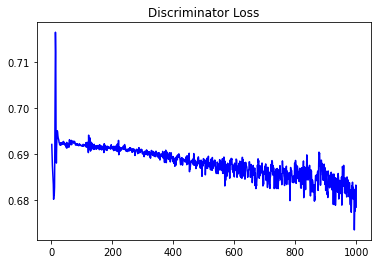

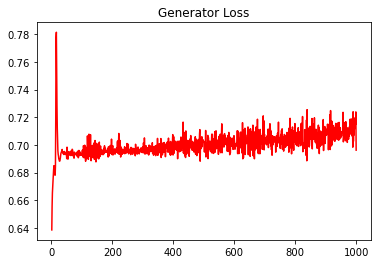

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5324045136490613


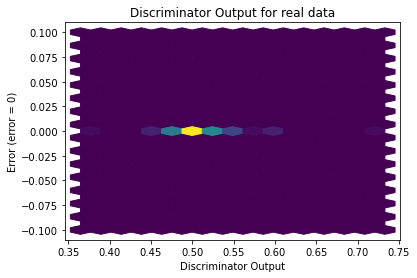

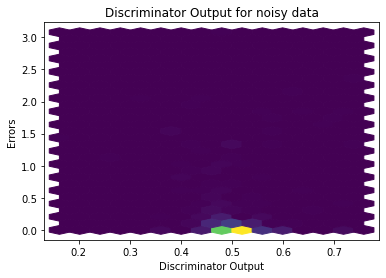

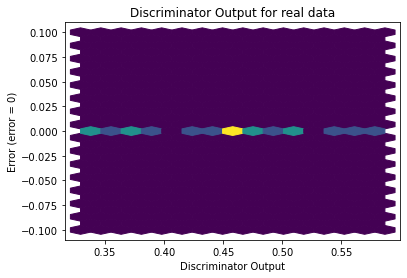

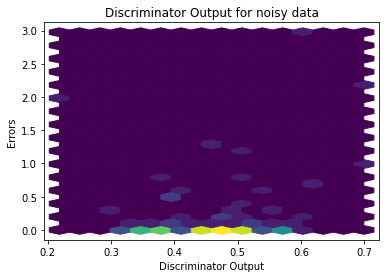

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


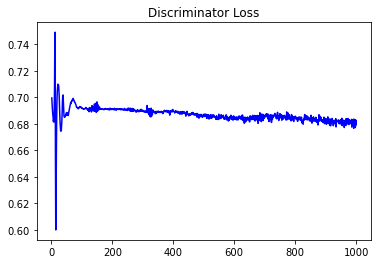

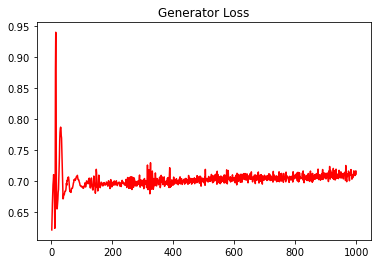

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6313254472594513


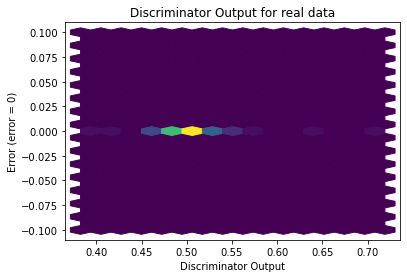

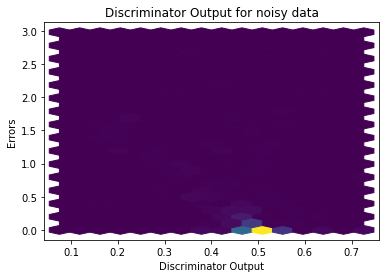

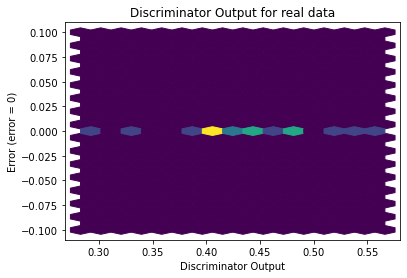

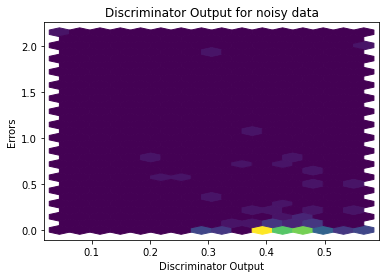

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5638]], requires_grad=True)
